<a href="https://colab.research.google.com/github/emrullahozkilinc/machine-learning/blob/master/calisma_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.metrics import confusion_matrix as conf
from sklearn.metrics import plot_confusion_matrix as conf_plot
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler as scl
from sklearn.model_selection import train_test_split as splitter

In [3]:
data_url = 'https://raw.githubusercontent.com/emrullahozkilinc/machine-learning/master/dataset/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
columns = ['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpd', 'Sgot', 'TP', 'ALB', 'A/G', 'target']
df = pd.read_csv(data_url, names=columns)

In [4]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpd,Sgot,TP,ALB,A/G,target
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [5]:
df.fillna(df.mean(), inplace=True)

Attribute Information:

1. Age Age of the patient
2. Gender Gender of the patient
3. TB Total Bilirubin
4. DB Direct Bilirubin
5. Alkphos Alkaline Phosphotase
6. Sgpt Alamine Aminotransferase
7. Sgot Aspartate Aminotransferase
8. TP Total Protiens
9. ALB Albumin
10. A/G Ratio Albumin and Globulin Ratio
11. Selector field used to split the data into two sets (labeled by the experts)

In [6]:
X = df[['A/G', 'Age', 'Sgot', 'Alkphos', 'Sgpd', 'TP', 'ALB']]
y = df['target'].values.reshape(-1,1)

In [7]:
X = scl().fit_transform(X).T

In [8]:
X_train, X_test, y_train, y_test = splitter(X.T, y, test_size = 0.33, random_state = 42)

In [9]:
clf = logreg(random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
clf.score(X_test, y_test)

0.7461139896373057

In [27]:
pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)

In [28]:
pred_proba = pred_proba[:,1]

In [12]:
sub = conf(y_test, pred)

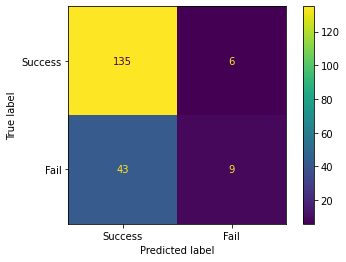

In [13]:
conf_plot(clf,X_test, y_test, display_labels=['Success', 'Fail'], values_format='d')

In [14]:
true_poz_neg = (sub[0][0] + sub[1][1]) / (sub.sum())
sensitivity = (sub[0][0]) / (sub[:,0].sum())
specificity = (sub[1][1]) / (sub[:,1].sum())

In [15]:
print('Score is '+ str(round(true_poz_neg, 3)) 
+ ' Sensitivity is '+ str(round(sensitivity, 3)) 
+ ' Specificity is '+ str(round(specificity, 3)))

Score is 0.746 Sensitivity is 0.758 Specificity is 0.6


In [29]:
logistic_roc = roc_auc_score(y_test, pred_proba)

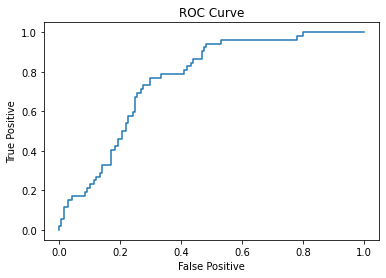

In [44]:
roc_x, roc_y, _ = roc_curve(y_test,  pred_proba, pos_label=2)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.title('ROC Curve')
plt.plot(roc_x,roc_y)